In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [4]:
label_dict = pickle.load(open('../data/label_dict.pkl', 'rb'))

In [5]:
def train_with_10fold(model, name, data_dir='../data/pca'):
    accuracies = []
    all_preds = []
    all_labels = []

    for test_id in range(10):
        dfs = []
        for i in range(10):
            if i != test_id:
                df = pd.read_csv(f'{data_dir}/fold{i}.csv')
                dfs.append(df)
        train_df = pd.concat(dfs, ignore_index=True)
        test_df = pd.read_csv(f'{data_dir}/fold{test_id}.csv')

        # X, y
        X_train, y_train = train_df.drop('label', axis=1), train_df['label']
        X_test, y_test = test_df.drop('label', axis=1), test_df['label']

        # 訓練 & 評估
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        all_preds.extend(y_pred)
        all_labels.extend(y_test)

        print(f'Fold {test_id} Accuracy: {acc:.4f}')

    print(f'\nAverage Accuracy: {np.mean(accuracies):.4f}')
    print(f'Total: {len(all_labels)}')

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (10-Fold CV) Using {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    print(classification_report(all_labels, all_preds))


Fold 0 Accuracy: 0.3757
Fold 1 Accuracy: 0.3840
Fold 2 Accuracy: 0.3924
Fold 3 Accuracy: 0.4040
Fold 4 Accuracy: 0.4840
Fold 5 Accuracy: 0.2977
Fold 6 Accuracy: 0.3640
Fold 7 Accuracy: 0.4876
Fold 8 Accuracy: 0.5061
Fold 9 Accuracy: 0.5125

Average Accuracy: 0.4208
Total: 8732


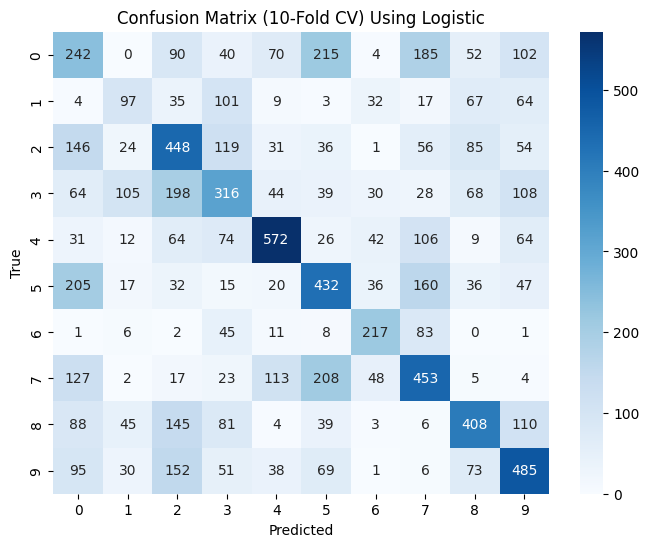

              precision    recall  f1-score   support

           0       0.24      0.24      0.24      1000
           1       0.29      0.23      0.25       429
           2       0.38      0.45      0.41      1000
           3       0.37      0.32      0.34      1000
           4       0.63      0.57      0.60      1000
           5       0.40      0.43      0.42      1000
           6       0.52      0.58      0.55       374
           7       0.41      0.45      0.43      1000
           8       0.51      0.44      0.47       929
           9       0.47      0.48      0.48      1000

    accuracy                           0.42      8732
   macro avg       0.42      0.42      0.42      8732
weighted avg       0.42      0.42      0.42      8732



In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
train_with_10fold(lr, 'Logistic')


Fold 0 Accuracy: 0.3093
Fold 1 Accuracy: 0.3851
Fold 2 Accuracy: 0.3157
Fold 3 Accuracy: 0.3919
Fold 4 Accuracy: 0.3857
Fold 5 Accuracy: 0.3098
Fold 6 Accuracy: 0.3687
Fold 7 Accuracy: 0.4020
Fold 8 Accuracy: 0.4400
Fold 9 Accuracy: 0.3823

Average Accuracy: 0.3691
Total: 8732


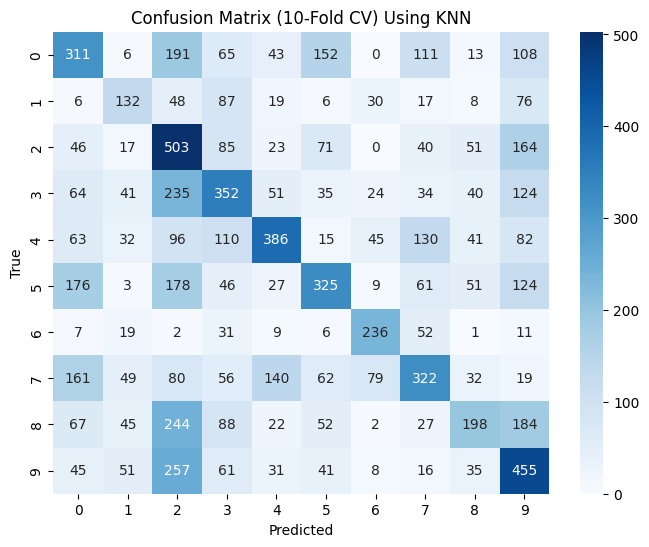

              precision    recall  f1-score   support

           0       0.33      0.31      0.32      1000
           1       0.33      0.31      0.32       429
           2       0.27      0.50      0.35      1000
           3       0.36      0.35      0.36      1000
           4       0.51      0.39      0.44      1000
           5       0.42      0.33      0.37      1000
           6       0.55      0.63      0.58       374
           7       0.40      0.32      0.36      1000
           8       0.42      0.21      0.28       929
           9       0.34      0.46      0.39      1000

    accuracy                           0.37      8732
   macro avg       0.39      0.38      0.38      8732
weighted avg       0.39      0.37      0.37      8732



In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
train_with_10fold(knn, 'KNN')

Fold 0 Accuracy: 0.4227
Fold 1 Accuracy: 0.4775
Fold 2 Accuracy: 0.3805
Fold 3 Accuracy: 0.4101
Fold 4 Accuracy: 0.4274
Fold 5 Accuracy: 0.3645
Fold 6 Accuracy: 0.4666
Fold 7 Accuracy: 0.4913
Fold 8 Accuracy: 0.5380
Fold 9 Accuracy: 0.5388

Average Accuracy: 0.4517
Total: 8732


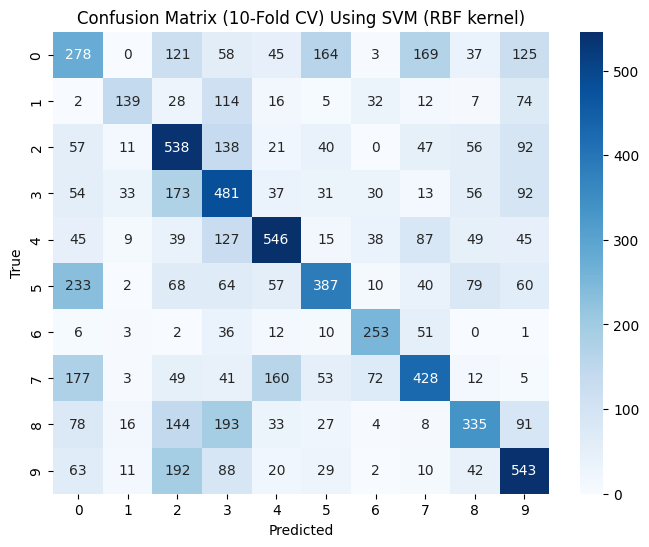

              precision    recall  f1-score   support

           0       0.28      0.28      0.28      1000
           1       0.61      0.32      0.42       429
           2       0.40      0.54      0.46      1000
           3       0.36      0.48      0.41      1000
           4       0.58      0.55      0.56      1000
           5       0.51      0.39      0.44      1000
           6       0.57      0.68      0.62       374
           7       0.49      0.43      0.46      1000
           8       0.50      0.36      0.42       929
           9       0.48      0.54      0.51      1000

    accuracy                           0.45      8732
   macro avg       0.48      0.46      0.46      8732
weighted avg       0.46      0.45      0.45      8732



In [8]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
train_with_10fold(svc, 'SVM (RBF kernel)')


Fold 0 Accuracy: 0.4696
Fold 1 Accuracy: 0.4932
Fold 2 Accuracy: 0.4843
Fold 3 Accuracy: 0.4697
Fold 4 Accuracy: 0.5107
Fold 5 Accuracy: 0.3742
Fold 6 Accuracy: 0.4737
Fold 7 Accuracy: 0.4801
Fold 8 Accuracy: 0.5895
Fold 9 Accuracy: 0.5615

Average Accuracy: 0.4907
Total: 8732


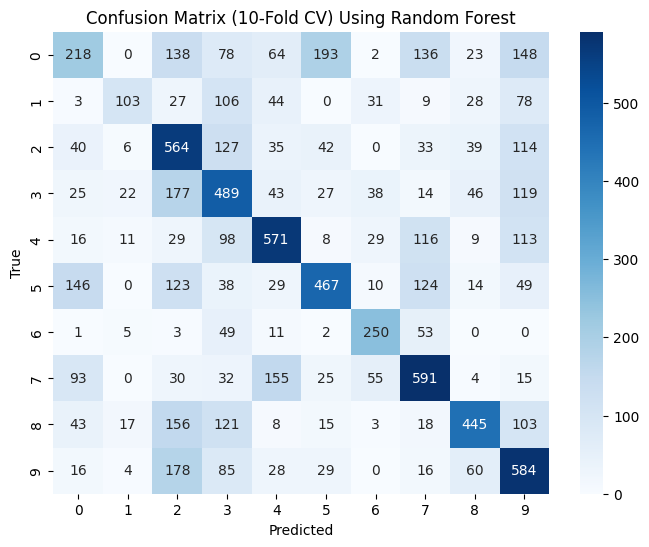

              precision    recall  f1-score   support

           0       0.36      0.22      0.27      1000
           1       0.61      0.24      0.35       429
           2       0.40      0.56      0.47      1000
           3       0.40      0.49      0.44      1000
           4       0.58      0.57      0.57      1000
           5       0.58      0.47      0.52      1000
           6       0.60      0.67      0.63       374
           7       0.53      0.59      0.56      1000
           8       0.67      0.48      0.56       929
           9       0.44      0.58      0.50      1000

    accuracy                           0.49      8732
   macro avg       0.52      0.49      0.49      8732
weighted avg       0.50      0.49      0.48      8732



In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_with_10fold(rf, 'Random Forest')

Fold 0 Accuracy: 0.4204
Fold 1 Accuracy: 0.4820
Fold 2 Accuracy: 0.4281
Fold 3 Accuracy: 0.4182
Fold 4 Accuracy: 0.5246
Fold 5 Accuracy: 0.3767
Fold 6 Accuracy: 0.4594
Fold 7 Accuracy: 0.4938
Fold 8 Accuracy: 0.5294
Fold 9 Accuracy: 0.5675

Average Accuracy: 0.4700
Total: 8732


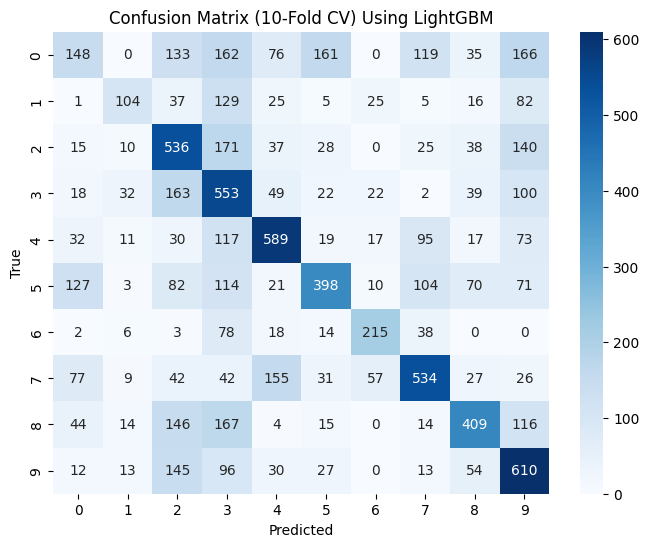

              precision    recall  f1-score   support

           0       0.31      0.15      0.20      1000
           1       0.51      0.24      0.33       429
           2       0.41      0.54      0.46      1000
           3       0.34      0.55      0.42      1000
           4       0.59      0.59      0.59      1000
           5       0.55      0.40      0.46      1000
           6       0.62      0.57      0.60       374
           7       0.56      0.53      0.55      1000
           8       0.58      0.44      0.50       929
           9       0.44      0.61      0.51      1000

    accuracy                           0.47      8732
   macro avg       0.49      0.46      0.46      8732
weighted avg       0.48      0.47      0.46      8732



In [10]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(verbose = 0)
train_with_10fold(lgb, 'LightGBM')

Fold 0 Accuracy: 0.4089
Fold 1 Accuracy: 0.4651
Fold 2 Accuracy: 0.4681
Fold 3 Accuracy: 0.4242
Fold 4 Accuracy: 0.4861
Fold 5 Accuracy: 0.3827
Fold 6 Accuracy: 0.4726
Fold 7 Accuracy: 0.4826
Fold 8 Accuracy: 0.4718
Fold 9 Accuracy: 0.5603

Average Accuracy: 0.4623
Total: 8732


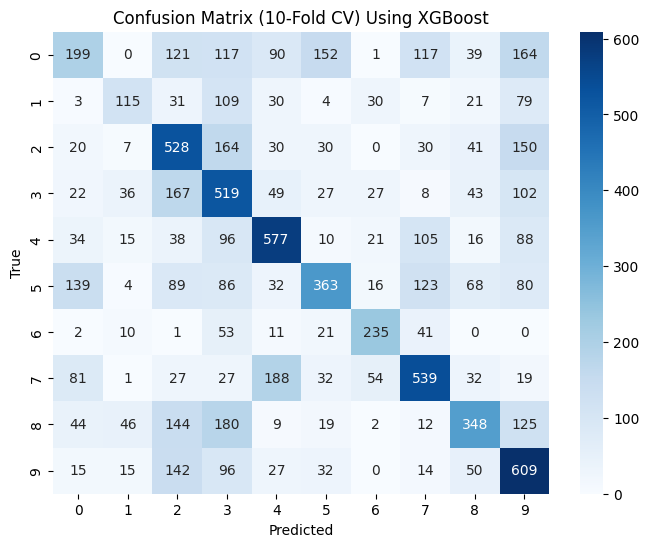

              precision    recall  f1-score   support

           0       0.36      0.20      0.26      1000
           1       0.46      0.27      0.34       429
           2       0.41      0.53      0.46      1000
           3       0.36      0.52      0.42      1000
           4       0.55      0.58      0.56      1000
           5       0.53      0.36      0.43      1000
           6       0.61      0.63      0.62       374
           7       0.54      0.54      0.54      1000
           8       0.53      0.37      0.44       929
           9       0.43      0.61      0.50      1000

    accuracy                           0.46      8732
   macro avg       0.48      0.46      0.46      8732
weighted avg       0.47      0.46      0.45      8732



In [11]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
train_with_10fold(xgb, 'XGBoost')

In [12]:
results_before_tuning = {
    'Logistic': {'0': 0.24, '1': 0.25, '2': 0.41, '3': 0.34, '4': 0.60, 
                 '5': 0.42, '6': 0.55, '7': 0.43, '8': 0.47, '9': 0.48},
    'KNN':      {'0': 0.32, '1': 0.32, '2': 0.35, '3': 0.36, '4': 0.44, 
                 '5': 0.37, '6': 0.58, '7': 0.36, '8': 0.28, '9': 0.39},
    'SVM-RBF':  {'0': 0.28, '1': 0.42, '2': 0.46, '3': 0.41, '4': 0.56, 
                 '5': 0.44, '6': 0.62, '7': 0.46, '8': 0.42, '9': 0.51},
    'RF':       {'0': 0.27, '1': 0.35, '2': 0.47, '3': 0.44, '4': 0.57, 
                 '5': 0.52, '6': 0.63, '7': 0.56, '8': 0.56, '9': 0.50},
    'LGBM':     {'0': 0.20, '1': 0.33, '2': 0.46, '3': 0.42, '4': 0.59, 
                 '5': 0.46, '6': 0.60, '7': 0.55, '8': 0.50, '9': 0.51},
    'XGB':      {'0': 0.26, '1': 0.34, '2': 0.46, '3': 0.42, '4': 0.56, 
                 '5': 0.43, '6': 0.62, '7': 0.54, '8': 0.44, '9': 0.50},
}

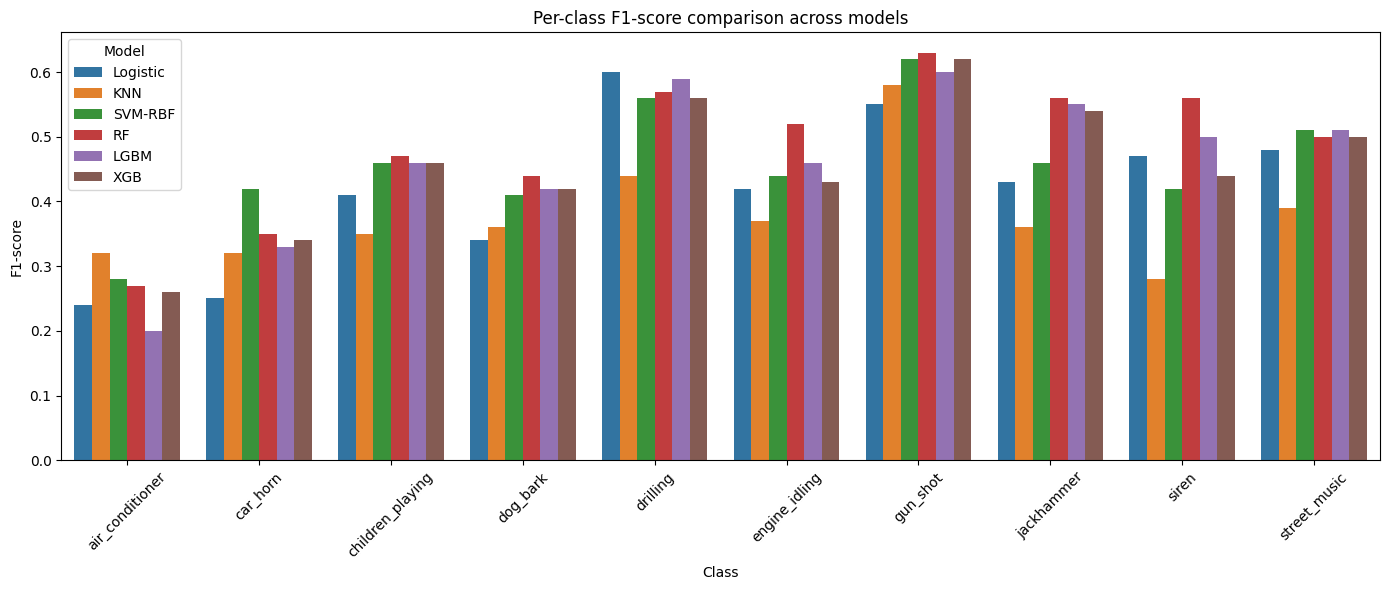

In [13]:
df = pd.DataFrame(results_before_tuning).T  # 模型為 index，label 為 column
df = df.reset_index().melt(id_vars='index', var_name='Class', value_name='F1-score')
df.rename(columns={'index': 'Model'}, inplace=True)

# 對照 label 名稱（如果有 label_dict 的話）
df['Class'] = df['Class'].astype(int).map(label_dict)

# 繪圖
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Class', y='F1-score', hue='Model')
plt.xticks(rotation=45)
plt.title("Per-class F1-score comparison across models")
plt.tight_layout()
plt.show()

In [15]:
def train_with_10fold_for_optuna(model, data_dir='../data/pca'):
    accuracies = []

    for test_id in range(10):
        # Combine folds except the test fold
        dfs = [pd.read_csv(f'{data_dir}/fold{i}.csv') for i in range(10) if i != test_id]
        train_df = pd.concat(dfs, ignore_index=True)
        test_df = pd.read_csv(f'{data_dir}/fold{test_id}.csv')

        X_train, y_train = train_df.drop('label', axis=1), train_df['label']
        X_test, y_test = test_df.drop('label', axis=1), test_df['label']

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    return sum(accuracies) / len(accuracies)


In [21]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 750, step=50),
        'max_depth': trial.suggest_int('max_depth', 30, 60, step=5),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
    }

    model = RandomForestClassifier(**params, n_jobs=-1, random_state=42, class_weight='balanced', max_features='sqrt')
    return train_with_10fold_for_optuna(model)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Accuracy:", study.best_value)


[I 2025-05-20 19:18:55,157] A new study created in memory with name: no-name-21286c06-3e22-48a5-9473-c1855d316273
[I 2025-05-20 19:19:01,731] Trial 0 finished with value: 0.5016956075730542 and parameters: {'n_estimators': 400, 'max_depth': 55, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.5016956075730542.
[I 2025-05-20 19:19:10,424] Trial 1 finished with value: 0.49812459236414497 and parameters: {'n_estimators': 550, 'max_depth': 55, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5016956075730542.
[I 2025-05-20 19:19:16,887] Trial 2 finished with value: 0.5004218392458333 and parameters: {'n_estimators': 400, 'max_depth': 45, 'min_samples_split': 11, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5016956075730542.
[I 2025-05-20 19:19:26,872] Trial 3 finished with value: 0.5005020628430092 and parameters: {'n_estimators': 600, 'max_depth': 60, 'min_samples_split': 12, 'min_samples_leaf': 1}. Best is trial 0 with v

Best Params: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 14, 'min_samples_leaf': 3}
Best Accuracy: 0.5055111723093718


Fold 0 Accuracy: 0.5040
Fold 1 Accuracy: 0.5293
Fold 2 Accuracy: 0.5092
Fold 3 Accuracy: 0.4808
Fold 4 Accuracy: 0.5310
Fold 5 Accuracy: 0.3864
Fold 6 Accuracy: 0.5143
Fold 7 Accuracy: 0.4851
Fold 8 Accuracy: 0.5368
Fold 9 Accuracy: 0.5783

Average Accuracy: 0.5055
Total: 8732


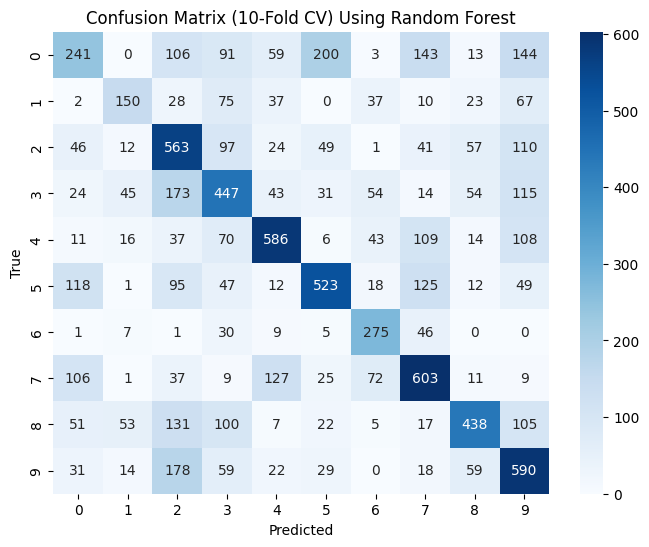

              precision    recall  f1-score   support

           0       0.38      0.24      0.30      1000
           1       0.50      0.35      0.41       429
           2       0.42      0.56      0.48      1000
           3       0.44      0.45      0.44      1000
           4       0.63      0.59      0.61      1000
           5       0.59      0.52      0.55      1000
           6       0.54      0.74      0.62       374
           7       0.54      0.60      0.57      1000
           8       0.64      0.47      0.54       929
           9       0.45      0.59      0.51      1000

    accuracy                           0.51      8732
   macro avg       0.51      0.51      0.50      8732
weighted avg       0.51      0.51      0.50      8732



In [26]:
rf = RandomForestClassifier(n_estimators=700, max_depth=50, min_samples_leaf=3, min_samples_split=14, class_weight='balanced', max_features='sqrt', random_state=42, n_jobs=-1)
train_with_10fold(rf, 'Random Forest')

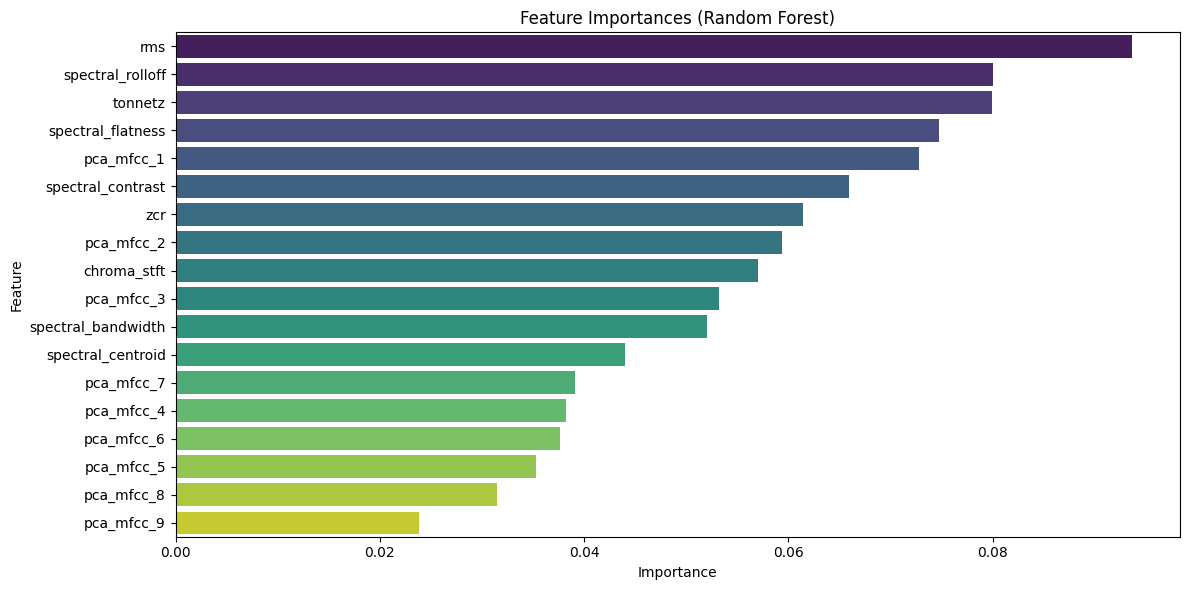

In [27]:
data = pd.read_csv('../data/pca/fold5.csv')
X = data.drop(['label'], axis=1)

# 假設你已經訓練過 rf_model，並且 X 是 DataFrame
importances = rf.feature_importances_
feature_names = X.columns

# 排序後畫圖
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis', hue='Feature', legend=False)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

In [28]:
# n_estimators=700, max_depth=50, min_samples_leaf=3, min_samples_split=14, class_weight='balanced', max_features='sqrt', random_state=42, n_jobs=-1
RF_param_grid = {
                    'n_estimators': 700, 
                    'max_depth': 50,
                    'min_samples_leaf': 3,
                    'min_samples_split': 14,
                    'class_weight': 'balanced',
                    'max_features':'sqrt',
                    'random_state': 42,
                    'n_jobs': -1
                }

pickle.dump(RF_param_grid, open('../models/RF_param_grid.pkl', 'wb'))